In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Classifying waste_dataset.csv')
df.head()

,Weight,Color,Texture,Odor,Type
0,0.81,1,0,0,Organic
1,1.91,1,1,1,Organic
2,1.49,1,1,0,Metal
3,1.24,0,0,1,Organic
4,0.40,1,1,0,Plastic


In [6]:
X = df[['Weight', 'Color', 'Texture', 'Odor']]
y = df['Type']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = DecisionTreeClassifier(random_state= 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [9]:
y_pred = model.predict(X_test)

In [10]:
y_pred

array(['Organic', 'Organic', 'Organic', ..., 'Organic', 'Organic',
       'Organic'], dtype=object)

In [11]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.941


In [12]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

       Metal       0.48      0.56      0.52       113
     Organic       1.00      1.00      1.00      1759
     Plastic       0.55      0.47      0.50       128

    accuracy                           0.94      2000
   macro avg       0.68      0.68      0.67      2000
weighted avg       0.94      0.94      0.94      2000



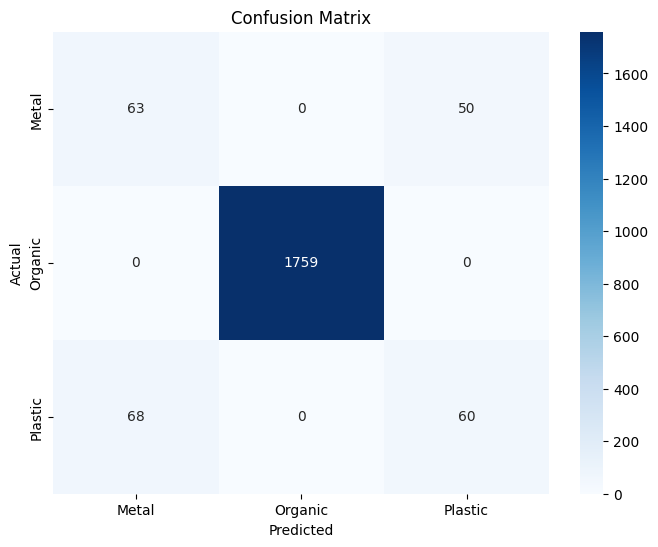

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [14]:
import joblib
joblib.dump(model, 'DT_Waste_Types_Recycling.pkl')

['DT_Waste_Types_Recycling.pkl']

In [16]:
import numpy as np
model = joblib.load('DT_Waste_Types_Recycling.pkl')
new_data = np.array([[0.8, 1, 0, 1]])
prediction = model.predict(new_data)
print(f"Predicted Classification Waste Types Output: {prediction}")

Predicted Classification Waste Types Output: ['Organic']


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
